# In this notebook:

1. **Part-of Speech Tagging Text (POS)**  --> categorised by types of words
2. **Named Entity Recognition (NER)**
3. extra: Python **Functions**


# 1. Part-of Speech Tagging Text

#### Questions & Objectives:

- How can I extract words that have a particular part of speech (POS) such as a noun or a verb?
- How can I visualise those extracted words?
- To use a POS tagger to lable a corpus.
- To extract words with a specific POS.
- To visualise the extracted words using a plot of freq_dist and a word cloud.

#### Key Points

- We use a NLTK’s part-of-speech tagger, averaged_perceptron_tagger, to label each word with part of speech, tense, number, (plural/singular)NN/NNS and case.
- We use the text from the US Presidential Inaugaral speeches, from the last speech by Trump.
- We then extracted all nouns both (NNS) and (NN).
- We then visualise the nouns from these speeches using a plot of freq_dist and a word cloud.

In [3]:
import nltk
import numpy
import string
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aaron\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In text mining it can be useful to extract words that have a particular part of speech (POS) such as a noun or a verb.  
For example extracting all proper nouns can give us names and locations. This is done using a POS-tagger. 

**The POS-tag of a word is a label of the word indicating its part of speech as well as grammatical categories such as tense, number (plural/singular) and case.  
POS tagging is the process of automatically determining the POS-tags of the tokens in a corpus.**

In this lesson, we will use NLTK’s `averaged_perceptron_tagger` as the POS-tagger. It uses the perceptron algorithm to predict which POS-tag is most likely given the word.   
We need to download the tagger in order to use it.

The POS-tagger outputs tokens tagged with their POS-tag. It uses the `Penn Treebank POS tagset` which is widely used for POS-tagging text.   
(https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html)

POS-tagging text is very useful when analysing a corpus or document and will allow us to do more indepth analysis and visualisations.   
In order to `pos-tag` using NLTK, you also have to `import pos_tag` from the tag package.

We are going to use the text from the US Presidential Inaugaral speeches. This is a data set that we can download from NLTK.

In [4]:
import nltk
nltk.download('averaged_perceptron_tagger')
from nltk.tag import pos_tag
nltk.download('inaugural')
from nltk.corpus import inaugural

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\aaron\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\aaron\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


This corpus comes in raw format but also is pre-tokenised.   
Therefore we can call the words() method to retrieve the tokenised text of all speeches.

In [5]:
inaugural_tokens=inaugural.words()
print(inaugural_tokens)

['Fellow', '-', 'Citizens', 'of', 'the', 'Senate', ...]


We can look at the tokens from the last inaugural, the one made by President Trump,   
by looking at the last member of the list of speeches using the fileids() method.

In [6]:
# filedid check.

inaugural_tokens_trump = inaugural.words(inaugural.fileids()[0:-1])
print(inaugural_tokens_trump)

['Fellow', '-', 'Citizens', 'of', 'the', 'Senate', ...]


We can assign POS-tags to all speeches using NLTK’s pos_tag() method and view the first 20:

In [7]:
tagged_inaugural_tokens = nltk.pos_tag(inaugural_tokens)
tagged_inaugural_tokens[:20]

[('Fellow', 'NNP'),
 ('-', ':'),
 ('Citizens', 'NNS'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('Senate', 'NNP'),
 ('and', 'CC'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('House', 'NNP'),
 ('of', 'IN'),
 ('Representatives', 'NNPS'),
 (':', ':'),
 ('Among', 'IN'),
 ('the', 'DT'),
 ('vicissitudes', 'NNS'),
 ('incident', 'NN'),
 ('to', 'TO'),
 ('life', 'NN'),
 ('no', 'DT')]

But what do these shortcuts mean? Official list is here https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html

But here's a cheatsheet with English examples for all of us who do not have a degree in linguistics (yet): 

```
CC coordinating conjunction
CD cardinal digit
DT determiner
EX existential there (like: “there is” … think of it like “there exists”)
FW foreign word
IN preposition/subordinating conjunction
JJ adjective ‘big’
JJR adjective, comparative ‘bigger’
JJS adjective, superlative ‘biggest’
LS list marker 1)
MD modal could, will
NN noun, singular ‘desk’
NNS noun plural ‘desks’
NNP proper noun, singular ‘Harrison’
NNPS proper noun, plural ‘Americans’
PDT predeterminer ‘all the kids’
POS possessive ending parent’s
PRP personal pronoun I, he, she
PRP$ possessive pronoun my, his, hers
RB adverb very, silently,
RBR adverb, comparative better
RBS adverb, superlative best
RP particle give up
TO, to go ‘to’ the store.
UH interjection, errrrrrrrm
VB verb, base form take
VBD verb, past tense took
VBG verb, gerund/present participle taking
VBN verb, past participle taken
VBP verb, sing. present, non-3d take
VBZ verb, 3rd person sing. present takes
WDT wh-determiner which
WP wh-pronoun who, what
WP$ possessive wh-pronoun whose
WRB wh-abverb where, when
```

it's from  https://medium.com/@gianpaul.r/tokenization-and-parts-of-speech-pos-tagging-in-pythons-nltk-library-2d30f70af13b

We can then set up lists to hold specific parts of speech such as nouns.   
Firstly we set up an empty list and the we search for the nouns, NN, NNS   
We can then print the first 20:

In [8]:
# all the singular nouns and plural nouns.

nouns = [] 
nouns = [word 
         for (word, pos) in tagged_inaugural_tokens 
         if (pos == 'NN' or pos == 'NNS')]  # NN == noun, singular ‘desk’  NNS == noun plural ‘desks’
nouns[:20]

['Citizens',
 'vicissitudes',
 'incident',
 'life',
 'event',
 'anxieties',
 'notification',
 'order',
 'day',
 'month',
 'hand',
 'Country',
 'voice',
 'veneration',
 'love',
 'retreat',
 'predilection',
 'flattering',
 'hopes',
 'decision']

Now that we have created this list of nouns, we can plot their counts in the corpus as we did yesterday (see lesson on frequency counts).

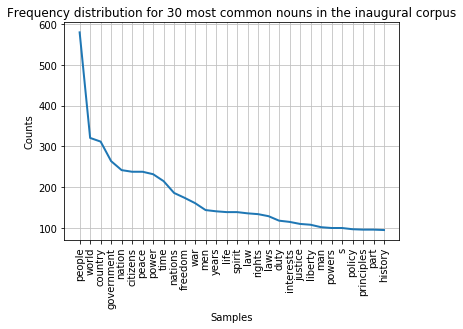

In [9]:
from nltk.probability import FreqDist
fdist = FreqDist(nouns)
fdist.plot(30,title='Frequency distribution for 30 most common nouns in the inaugural corpus')

We can also plot the nouns as a word cloud like we did yesterday (see lesson on Counting tokens in text):

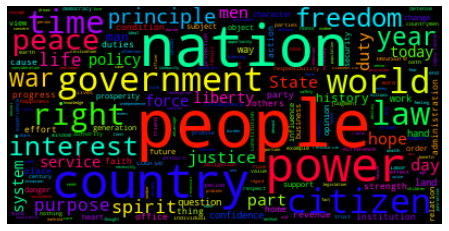

In [10]:
# !pip install WordCloud

from wordcloud import WordCloud
%matplotlib inline
import matplotlib.pyplot as plt
cloud = WordCloud(max_font_size=60,colormap="hsv").generate(' '.join(nouns)) # generate function?
plt.rcParams["figure.figsize"] = (8,4)
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 🐛Minitask

Change the code above to create a frequency list for the most common adjectives in the inaugural corpus. The POS-tag for adjective ‘JJ’.

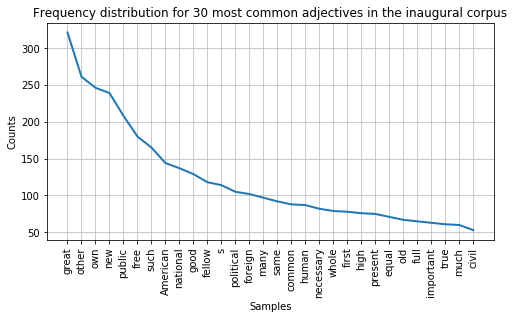

In [11]:
# Answer 
# JJ adjective ‘big’

adjective = [] 
adjective = [word 
         for (word, pos) in tagged_inaugural_tokens 
         if (pos == 'JJ')]  # JJ adjective ‘big’

# adjective [:20]

fdist = FreqDist(adjective)
fdist.plot(30,title='Frequency distribution for 30 most common adjectives in the inaugural corpus')


# can see stopwords --> such/s/human

### 🐛Minitask

Plot a word cloud of the adjectives in the inaugural corpus.

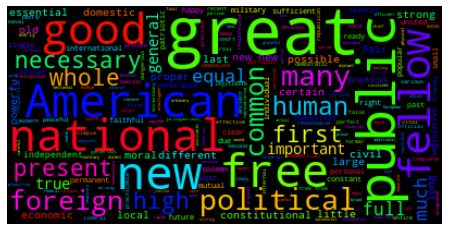

In [12]:
# Answer

cloud = WordCloud(max_font_size=60,colormap="hsv").generate(' '.join(adjective)) # generate function?
plt.rcParams["figure.figsize"] = (8,4)
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 🐛Minitask

You can do the same for another POS-tag. For the full list of Penn Treebank POS tags above in this notebook

In [13]:
# Answer

# 2. Named Entity Recognition

**Named entity recognition (NER) or named entity tagging** is a way of locating and classifying named entities in text (e.g. names of people, locations and organisations).  
NER can be used to identity networks of people mentioned in data or as the first step towards geo-parsing text,   
i.e. extracting and disambiguating locations mentioned in text.
There are several off-the-shelf NER taggers that we can use.   
Here we will be using the spaCy tagger.

To use it, you need to first install it and load the model required to run it.  
You should have installed spacy as part of the [Prerequisites](https://github.com/bea-alex/text-mining-course/blob/master/prerequisites.md)   
but if not then go back to do that now before you import spacy and load the model.

In [14]:
# !pip install -U spacy
# !python -m spacy download en_core_web_sm

import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()

So we will use their raw text using **inaugural.raw()**  
as input to tag it with named entities (in this case names of people, organisations and locations).  
To do that we just call nlp() on that list of word tokens.  
This can take a few seconds as it has to process all of the inaugural corpus. The results are stored in the variable doc.

In [15]:
text=inaugural.raw()   # what happen here
doc = nlp(text)        # What happen here

# print the first 5 entities in the text and entity tags:

for i in range(5):
    print(doc.ents[i].text + ", " + doc.ents[i].label_)

# save the entities separately in a list of tuples by extracting them for the output ```doc``` 
# and then print the first 30 entries of that list:    

ents=doc.ents
named_entities = [(ent.text, ent.label_) for ent in ents] 
named_entities[:30]

Fellow-Citizens, PRODUCT
Senate, ORG
the House of Representatives, ORG
the 14th day of the present month, DATE
first, ORDINAL


[('Fellow-Citizens', 'PRODUCT'),
 ('Senate', 'ORG'),
 ('the House of Representatives', 'ORG'),
 ('the 14th day of the present month', 'DATE'),
 ('first', 'ORDINAL'),
 ('the United States a Government', 'GPE'),
 ('the United States', 'GPE'),
 ('republican', 'NORP'),
 ('American', 'NORP'),
 ('fifth', 'ORDINAL'),
 ('Constitution', 'LAW'),
 ('the House of Representatives', 'ORG'),
 ('Parent of the Human Race', 'ORG'),
 ('American', 'NORP'),
 ('united America', 'LOC'),
 ('Constitution', 'LAW'),
 ('first', 'ORDINAL'),
 ('America', 'GPE'),
 ('first', 'ORDINAL'),
 ('little more than half', 'CARDINAL'),
 ('the Revolutionary war', 'EVENT'),
 ('Confederation', 'ORG'),
 ('Batavian', 'NORP'),
 ('Helvetic', 'LOC'),
 ('a single day', 'DATE'),
 ('Congress', 'ORG'),
 ('States', 'GPE'),
 ('States', 'GPE'),
 ('America', 'GPE'),
 ('Constitution of Government', 'LAW')]

You can do the same for specific entity types (e.g. organisation (ORG) or person (PER).  
At this point we will introduce the concept of function to make this easily repeatable for different types.

## Functions: the most powerful tool in programmer's hands:

__Function:__ A function is a block of code that can be called to complete a task.

We already used a lot of functions that python creators have created for us. like `print()` or `len()`. Notice what `len()` does:

`length_of_list = len( [4,5,6] )`

It's like a magic spell that Harry Potter has learned, and now he can use it in different context and on different things.
 
eg. once Harry learned how to freeze things with `glacius` spell, he can then use it on various objects: 

`ice = glacius( water )`

`frozen_malfoy = glacius( malfoy )`

etc. Notice that this spell **takes** some **ARGUMENTS** which are sort of like inputs, and **returns** something new or changed.

Overall syntax of using a function is 

`result = function_name( argument )` or even 

`result = function_name( argument1, argument2, argument3etc )`


#### Creating our own functions:

The most amazing thing is that we can create our own functions:

In Python a function is defined using the ```def``` keyword. The name of the function is specified after ```def``` and the parameters passed to the function are specified in round brackets after the name.  The indented bit of code after the function specifies everything that the function computes. A function can return data as a result of the computation it has performed using the ```return``` keyword.

`def my_own_function( argument1, argument2, argument3):
    do something with arguments
    return some_value`

The important detail is: when you define a function, it is like LEARNING a spell.  
You did not yet CALL/TRIGGER/CAST that spell.  
eg. it is possible to learn freezing spell without actually freezing things around you.

- define a function: teach computer what to do `def something:`
- call a function: use the skill you learned earlier `something()`

for example:

In [28]:
# here I define the function - notice nothing happened yet when you run this cell!

def add_numbers( number1, number2 ):
    print("adding numbers now!")
    return number1 + number2

# "adding numbers now!" is NOT printed yet, because function is defined, but not used yet!

In [17]:
# here I call the function, it will return the value
my_result = add_numbers(3,5)
print("I'm done adding")
print(my_result)

adding numbers now!
I'm done adding
8


Here's anbother example of a function:

In [18]:
def is_first_number_larger( number1, number2):
    if number1 > number2:
        return True
    else:
        return False

In [19]:
my_result = is_first_number_larger(3,5)
print(my_result)
my_result = is_first_number_larger(12,5)
print(my_result)

False
True


In [20]:
# you could even put the return value of a function right into a print:

print(is_first_number_larger(12,5))

True


### 🐛Minitask

Write a function that tells you if a word is longer than a number, like is_word_longer_than(word, number) that you could call like example below:

In [21]:
# here write your function, so that below code works. Then call your function many times
def is_word_longer_than(word, number):
    if len(word) > number:
        return True
    else:
        return False

# tests:
print(is_word_longer_than("banana", 4)) # should be true
print(is_word_longer_than("banana", 12)) # should be false
print(is_word_longer_than("plum", 3)) # should be true
print(is_word_longer_than("plum", 4)) # should be false
print(is_word_longer_than("plum", 5)) # should be false

True
False
True
False
False


### Back into text mining: Using functions to help us with our work:

Below is the ```get_entities_of_type()``` function.  

It contains code that extr
acts named entities of a specific type from the NER-tagged output.  
This function takes as input the ```type``` and  ```named_entities``` list.  
It will use them to filter entities and return only the entities of the specified type marked up in the text.

In [22]:
def get_entities_of_type(type_we_seek, entities):
    ents = [string 
            for (string, tag) in entities 
            if (tag == type_we_seek)] 
    # you can add indentation to the above line if you like
    print("Number of strings tagged as " + type_we_seek + " " + str(len(ents)))
    return ents

To run the function you need to specify the type and the output list can be stored in a new variable (people).  
You can then inspect the first few person entities and you will see that the tagger is not always correct (e.g. Jealous, Distinct).

In [30]:
type="PERSON"
people = get_entities_of_type(type, named_entities)
people[:10]

Number of strings tagged as PERSON 168


['Creator',
 'Providence',
 'Divine',
 'Roman',
 'Creator',
 'Jefferson',
 'Madison',
 'Jefferson',
 'Caesar',
 'Jefferson']

Notice the difference.

Before we used functions:

`type="PERSON"
persons = [string for (string, tag) in named_entities if (tag == type_we_seek)]
type="ORG"
organisations = [string for (string, tag) in named_entities if (tag == type_we_seek)]`

with a function:

`type="PERSON"
persons = get_entities_of_type(type, named_entities)
type="ORG"
organisations = get_entities_of_type(type, named_entities)`

It's just cleaner and prettier. But also right now our calculations took just one line.  
Imagine we needed 10 lines of calculations in the top bit...  
these two examples would take us 20 lines of code.

But with functions it would take just 2 lines (2 calls of the function), and some extra lines to define it.

## Rule of thumb: if you do something a lot, and catch yourself copy-pasting a lot of code, create a function for it, and extract all the 'variables' (things that vary) into function arguments.


We can plot the entites extracted by their frequency or create word clouds for them.  
For example, we can create a word cloud just for the person names mentioned in the corpus.

To do that we need to create a Counter dictionary containing the counts for each repetition of an entity.  
A Counter is a subclass of a Dictionary and elements are stored as key and their counts as values.

As you can see, spaCy recognised 109 unique person names in the inaugural speeches,   
some of them occurring more than others.

In [24]:
from collections import Counter

people_dict=Counter(people)
print("Number of unique person names: " + str(len(people_dict)))
print(people_dict)

Number of unique person names: 96
Counter({'God': 12, 'Chief Justice': 9, 'Jefferson': 8, 'Bush': 6, 'Creator': 5, 'Providence': 5, 'Speaker': 5, 'Divine': 4, 'George Washington': 4, 'Clinton': 4, 'Santo Domingo': 3, 'Abraham Lincoln': 3, 'Vice': 3, 'President': 3, 'Thomas Jefferson': 3, 'Caesar': 2, 'Divine Providence': 2, 'Johnson': 2, 'Eisenhower': 2, 'Bible': 2, "O'Neill": 2, 'Mathias': 2, 'Dole': 2, 'Majority Leader': 2, 'Carter': 2, 'Roman': 1, 'Madison': 1, 'Octavius': 1, 'Anthony': 1, 'Gaul': 1, 'Ruler': 1, 'Melancholy': 1, 'Whilst': 1, 'kindred': 1, 'Fellow-Citizens': 1, 'Fort Sumter': 1, 'Grant': 1, 'Yorktown': 1, 'Webster': 1, 'kindred evils': 1, 'arid lands': 1, 'Monroe': 1, 'Root': 1, 'Gatun': 1, 'Governments': 1, 'Calvin Coolidge': 1, 'Convention': 1, 'Comfort': 1, 'Tarry': 1, 'Peabody': 1, 'Thou': 1, 'Iwo Jima': 1, 'a Divine Providence': 1, 'Nixon': 1, 'Truman': 1, 'Dirksen': 1, 'Humphrey': 1, 'Franklin Delano Roosevelt': 1, 'Archibald MacLeish': 1, 'Cook': 1, 'Julia Col

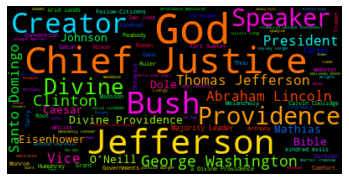

In [25]:
cloud = WordCloud(max_font_size=50,colormap="hsv").generate_from_frequencies(people_dict)

plt.figure(figsize=(6,5))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 🐛Minitask: 

Create a similar word cloud but for the location names in the corpus

In [26]:
# you can code here:



### 🦋 Extra task (optional):

look at the most common parts of code that we used in the notebooks and reused, and turn them into functions.

These functions could be your tools that you will use later, like a personal crafted cheat-sheet.

In [27]:
# you can code here: